In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline
# Импортируем один из пакетов Matplotlib
import pylab
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


Загрузим данные с диска и объявим переменные, которые позволят с диском работать

In [2]:
from google.colab import drive
drive = drive.mount('/content/drive')
data_folder = '/content/drive/My Drive/bauman/diplom/'

Mounted at /content/drive


Читаем датасет, объединяем и проверяем на пропуски, в файле безымянный столбец назвал "Индекс", чтобы не мучаться.
X_nup
X_bp

In [3]:
df = pd.read_excel(data_folder + 'X_nup.xlsx', index_col=0)
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


(        Угол нашивки, град  Шаг нашивки  Плотность нашивки
 Индекс                                                    
 0.0                    0.0          4.0               57.0
 1.0                    0.0          4.0               60.0
 2.0                    0.0          4.0               70.0
 3.0                    0.0          5.0               47.0
 4.0                    0.0          5.0               57.0, None)

In [4]:
df2 = pd.read_excel(data_folder + 'X_bp.xlsx', index_col=0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


Пропусков нет, делаем Inner, очевидно, строк будет не более, чем в меньшем множестве

In [5]:
df = df.join(df2, how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   float64
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность п

Выведем статистику по данным на предмет быстрой оценки, есть ли выбросы вообще. Сразу бросается в глаза, что "Шаг нашивки", "Плотность нашивки" какие-то странные, значит, нужно анализировать на выбросы

In [6]:
df.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,44.252199,6.899222,57.153929,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,45.015793,2.563467,12.350969,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.000000,0.000000,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,0.000000,5.080033,49.799212,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,0.000000,6.916144,57.341920,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,90.000000,8.586293,64.944961,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,90.000000,14.440522,103.988901,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


In [7]:
columns = df.columns

**Гистограммы распределения каждой из переменной**

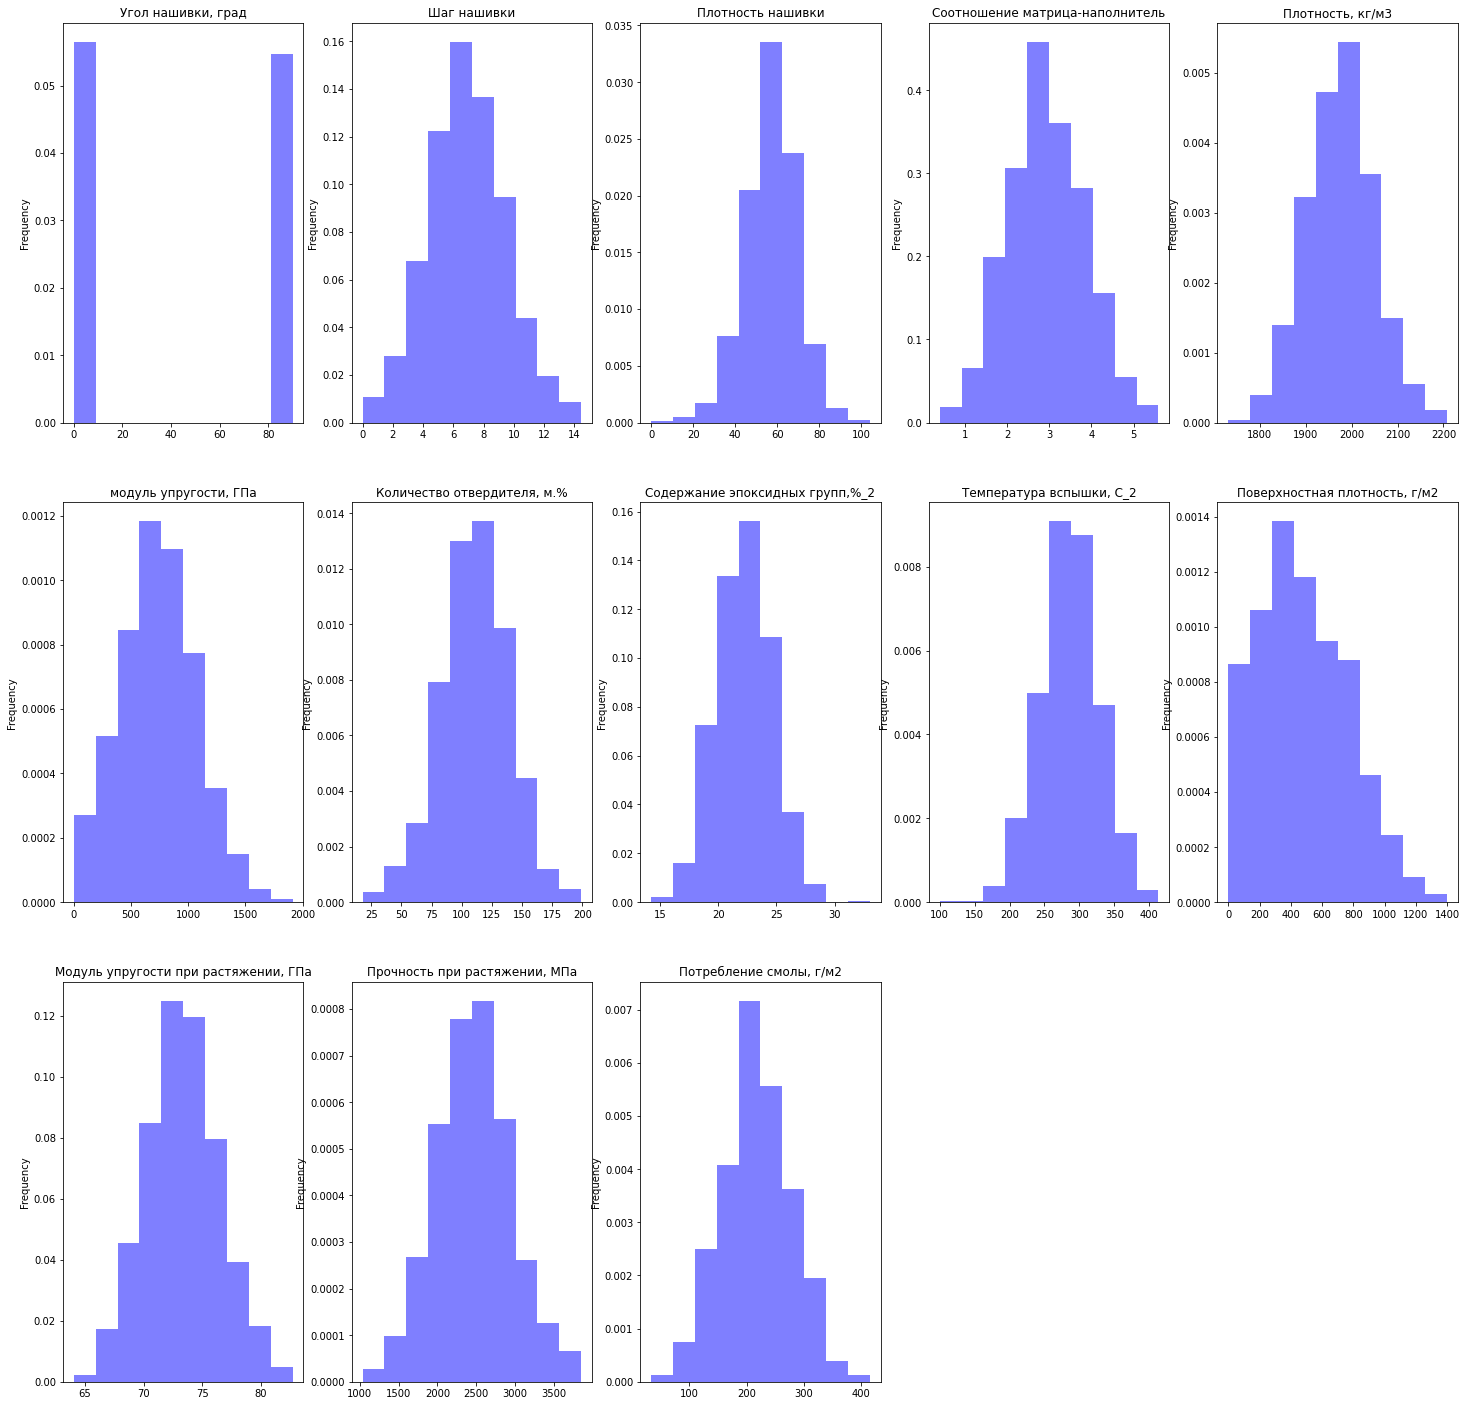

In [8]:
plt.figure(figsize=(25, 25))
for i, context in enumerate(columns):
    #sns.set(context=context)  # Устанавливаем стиль
    plt.subplot(3, 5, i+1)  
    df[columns[i]].plot(kind='hist', density=1, stacked=False, alpha=.5, color='blue')
    plt.title(context)

**Диаграммы ящика с усами**

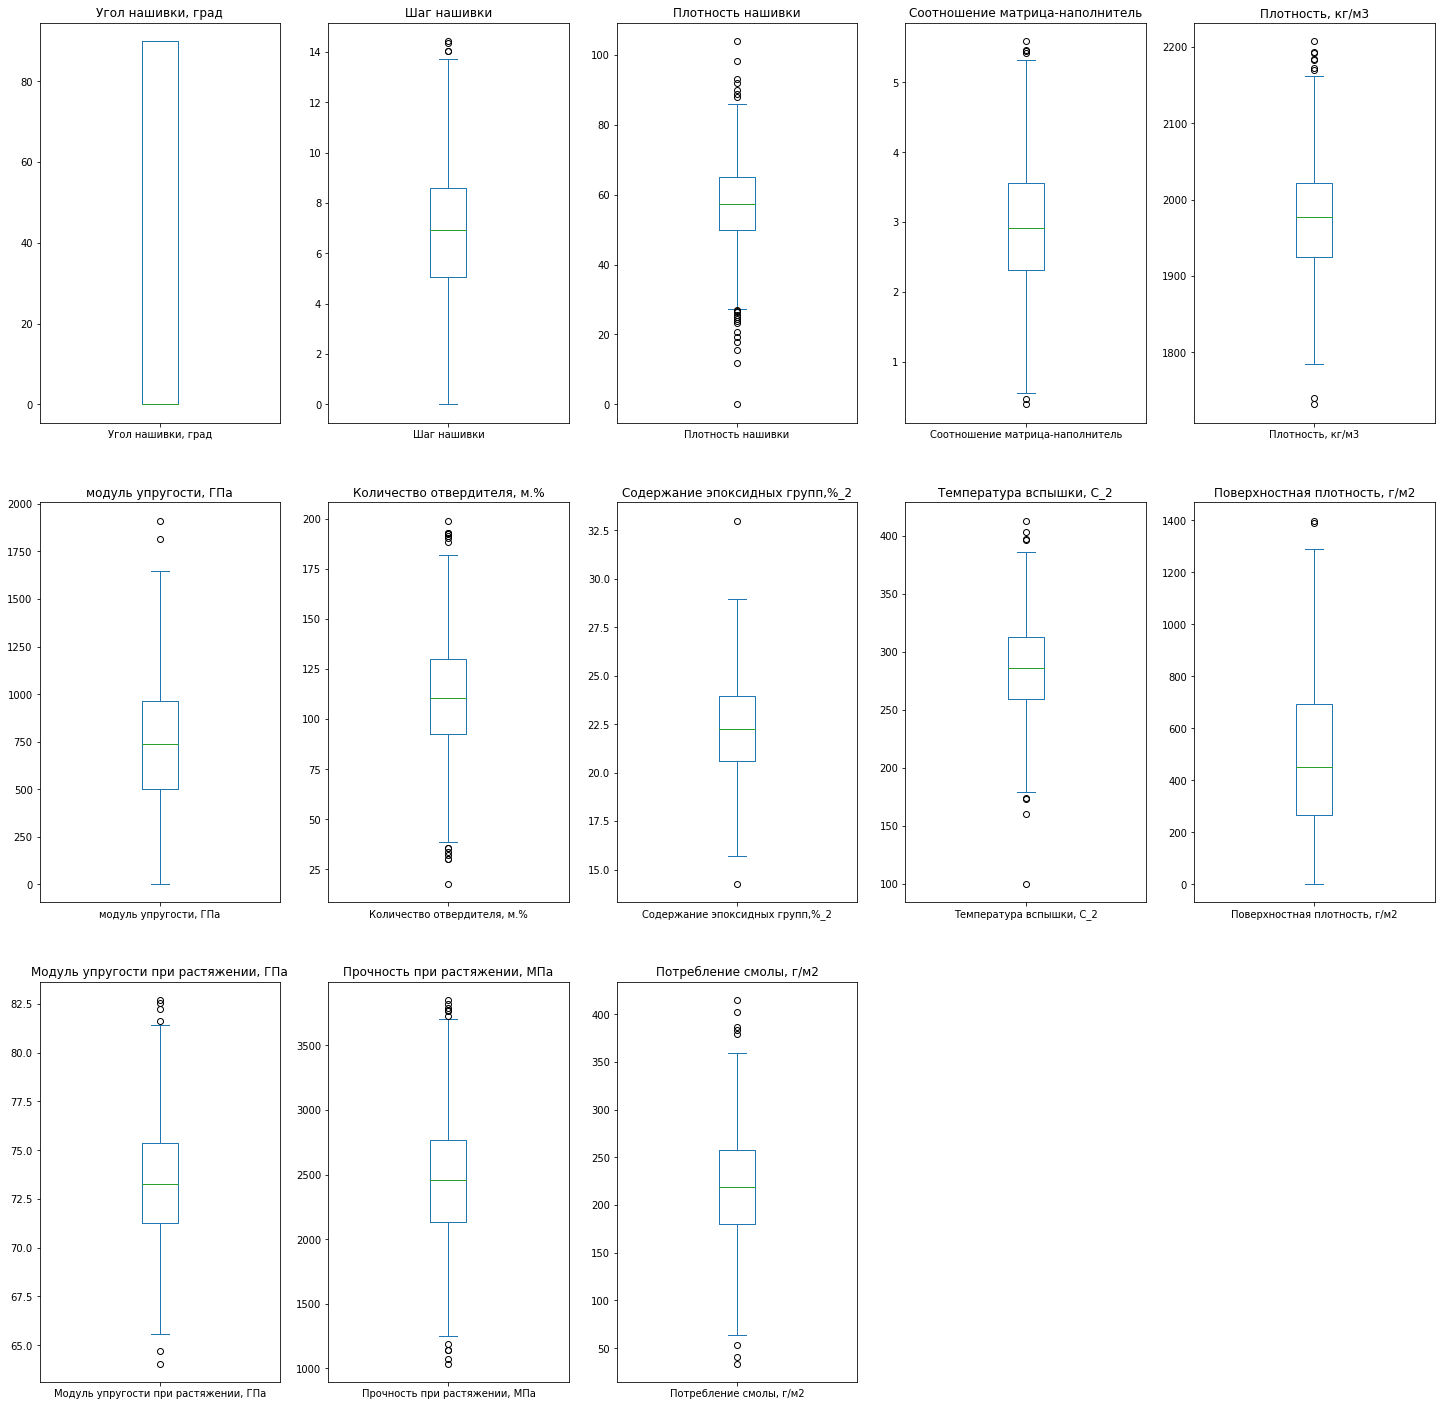

In [9]:
plt.figure(figsize=(25, 25))
for i, context in enumerate(columns):

    #sns.set(context=context)  # Устанавливаем стиль
    plt.subplot(3, 5, i+1)
    df[columns[i]].plot.box(return_type='both')
    plt.title(context)


Из графиков очевидно следует, что выбросы существуют и они в ряде случаев значительные. Проведем анализ количества данных с выбросами по уровням квантилям 0,015 и 0,985
, т.е. выбросим 3 % "хвостиков"


In [10]:
for column in df.columns:

    q75,q25 = np.percentile(df.loc[:,column],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    
    count = df[column][(df[column] < min) | (df[column] > max)].count()

    print(f"Данные: {column} --- Количество выбросов {count} --- Нижняя зона {min} --- Верхняя зона {max}.")

    #df.loc[df[column] < min,column] = np.nan
    #df.loc[df[column] > max,column] = np.nan

Данные: Угол нашивки, град --- Количество выбросов 0 --- Нижняя зона -135.0 --- Верхняя зона 225.0.
Данные: Шаг нашивки --- Количество выбросов 4 --- Нижняя зона -0.17935697327385558 --- Верхняя зона 13.845682536538867.
Данные: Плотность нашивки --- Количество выбросов 21 --- Нижняя зона 27.08058869124911 --- Верхняя зона 87.66358461459389.
Данные: Соотношение матрица-наполнитель --- Количество выбросов 6 --- Нижняя зона 0.4657267649425636 --- Верхняя зона 5.4048197761021415.
Данные: Плотность, кг/м3 --- Количество выбросов 9 --- Нижняя зона 1778.3271053007102 --- Верхняя зона 2167.20273608743.
Данные: модуль упругости, ГПа --- Количество выбросов 2 --- Нижняя зона -192.6001603192973 --- Верхняя зона 1654.4601385737328.
Данные: Количество отвердителя, м.% --- Количество выбросов 14 --- Нижняя зона 36.51319505659012 --- Верхняя зона 185.66066810509074.
Данные: Содержание эпоксидных групп,%_2 --- Количество выбросов 2 --- Нижняя зона 15.57718502104257 --- Верхняя зона 28.99278301000118.


In [11]:
low = 0.015
up = 0.985
for i, context in enumerate(columns):
  lower_bound = df[columns[i]].quantile(q=low)
  upper_bound = df[columns[i]].quantile(q=up)
  count = df[columns[i]][(df[columns[i]] < lower_bound) | (df[columns[i]] > upper_bound)].count()
  
  print(f"Данные: {context} --- Количество выбросов {count} --- Нижняя зона {lower_bound} --- Верхняя зона {upper_bound}.")

Данные: Угол нашивки, град --- Количество выбросов 0 --- Нижняя зона 0.0 --- Верхняя зона 90.0.
Данные: Шаг нашивки --- Количество выбросов 32 --- Нижняя зона 1.4281370925922892 --- Верхняя зона 12.709049828623273.
Данные: Плотность нашивки --- Количество выбросов 32 --- Нижняя зона 28.00602148547013 --- Верхняя зона 83.70202294979067.
Данные: Соотношение матрица-наполнитель --- Количество выбросов 32 --- Нижняя зона 1.0232482232719367 --- Верхняя зона 4.901125992506653.
Данные: Плотность, кг/м3 --- Количество выбросов 32 --- Нижняя зона 1819.5711385549462 --- Верхняя зона 2144.261686603016.
Данные: модуль упругости, ГПа --- Количество выбросов 32 --- Нижняя зона 62.50518127804588 --- Верхняя зона 1465.1803951387562.
Данные: Количество отвердителя, м.% --- Количество выбросов 32 --- Нижняя зона 46.31308974594494 --- Верхняя зона 169.92305311390257.
Данные: Содержание эпоксидных групп,%_2 --- Количество выбросов 32 --- Нижняя зона 17.13191079239197 --- Верхняя зона 27.331832072311084.
Д

In [12]:
q75,q25 = np.percentile(df.loc[:,'Потребление смолы, г/м2'],[75,25])

lower_bound = df['Потребление смолы, г/м2'].quantile(q=0.25)
lower_bound, q75,q25

(179.6275202311005, 257.48172405689, 179.6275202311005)

In [13]:
#Задаем верхнюю и нижнюю границу квантиля, бежим по каждому столбцу и считаем, сколько значений выходит за границы этих квантилей
low = 0.015
up = 0.985
for i, context in enumerate(columns):
  lower_bound = df[columns[i]].quantile(q=low)
  upper_bound = df[columns[i]].quantile(q=up)
  count = df[columns[i]][(df[columns[i]] < lower_bound) | (df[columns[i]] > upper_bound)].count()
  
  print(f"Данные: {context} --- Количество выбросов {count} --- Нижняя зона {lower_bound} --- Верхняя зона {upper_bound}.")



Данные: Угол нашивки, град --- Количество выбросов 0 --- Нижняя зона 0.0 --- Верхняя зона 90.0.
Данные: Шаг нашивки --- Количество выбросов 32 --- Нижняя зона 1.4281370925922892 --- Верхняя зона 12.709049828623273.
Данные: Плотность нашивки --- Количество выбросов 32 --- Нижняя зона 28.00602148547013 --- Верхняя зона 83.70202294979067.
Данные: Соотношение матрица-наполнитель --- Количество выбросов 32 --- Нижняя зона 1.0232482232719367 --- Верхняя зона 4.901125992506653.
Данные: Плотность, кг/м3 --- Количество выбросов 32 --- Нижняя зона 1819.5711385549462 --- Верхняя зона 2144.261686603016.
Данные: модуль упругости, ГПа --- Количество выбросов 32 --- Нижняя зона 62.50518127804588 --- Верхняя зона 1465.1803951387562.
Данные: Количество отвердителя, м.% --- Количество выбросов 32 --- Нижняя зона 46.31308974594494 --- Верхняя зона 169.92305311390257.
Данные: Содержание эпоксидных групп,%_2 --- Количество выбросов 32 --- Нижняя зона 17.13191079239197 --- Верхняя зона 27.331832072311084.
Д

Датасет повел себя странно. количество выбросов при 0,015 и 0,985 оказалось одинаковым в каждом столбце. Исследуем это подробнее

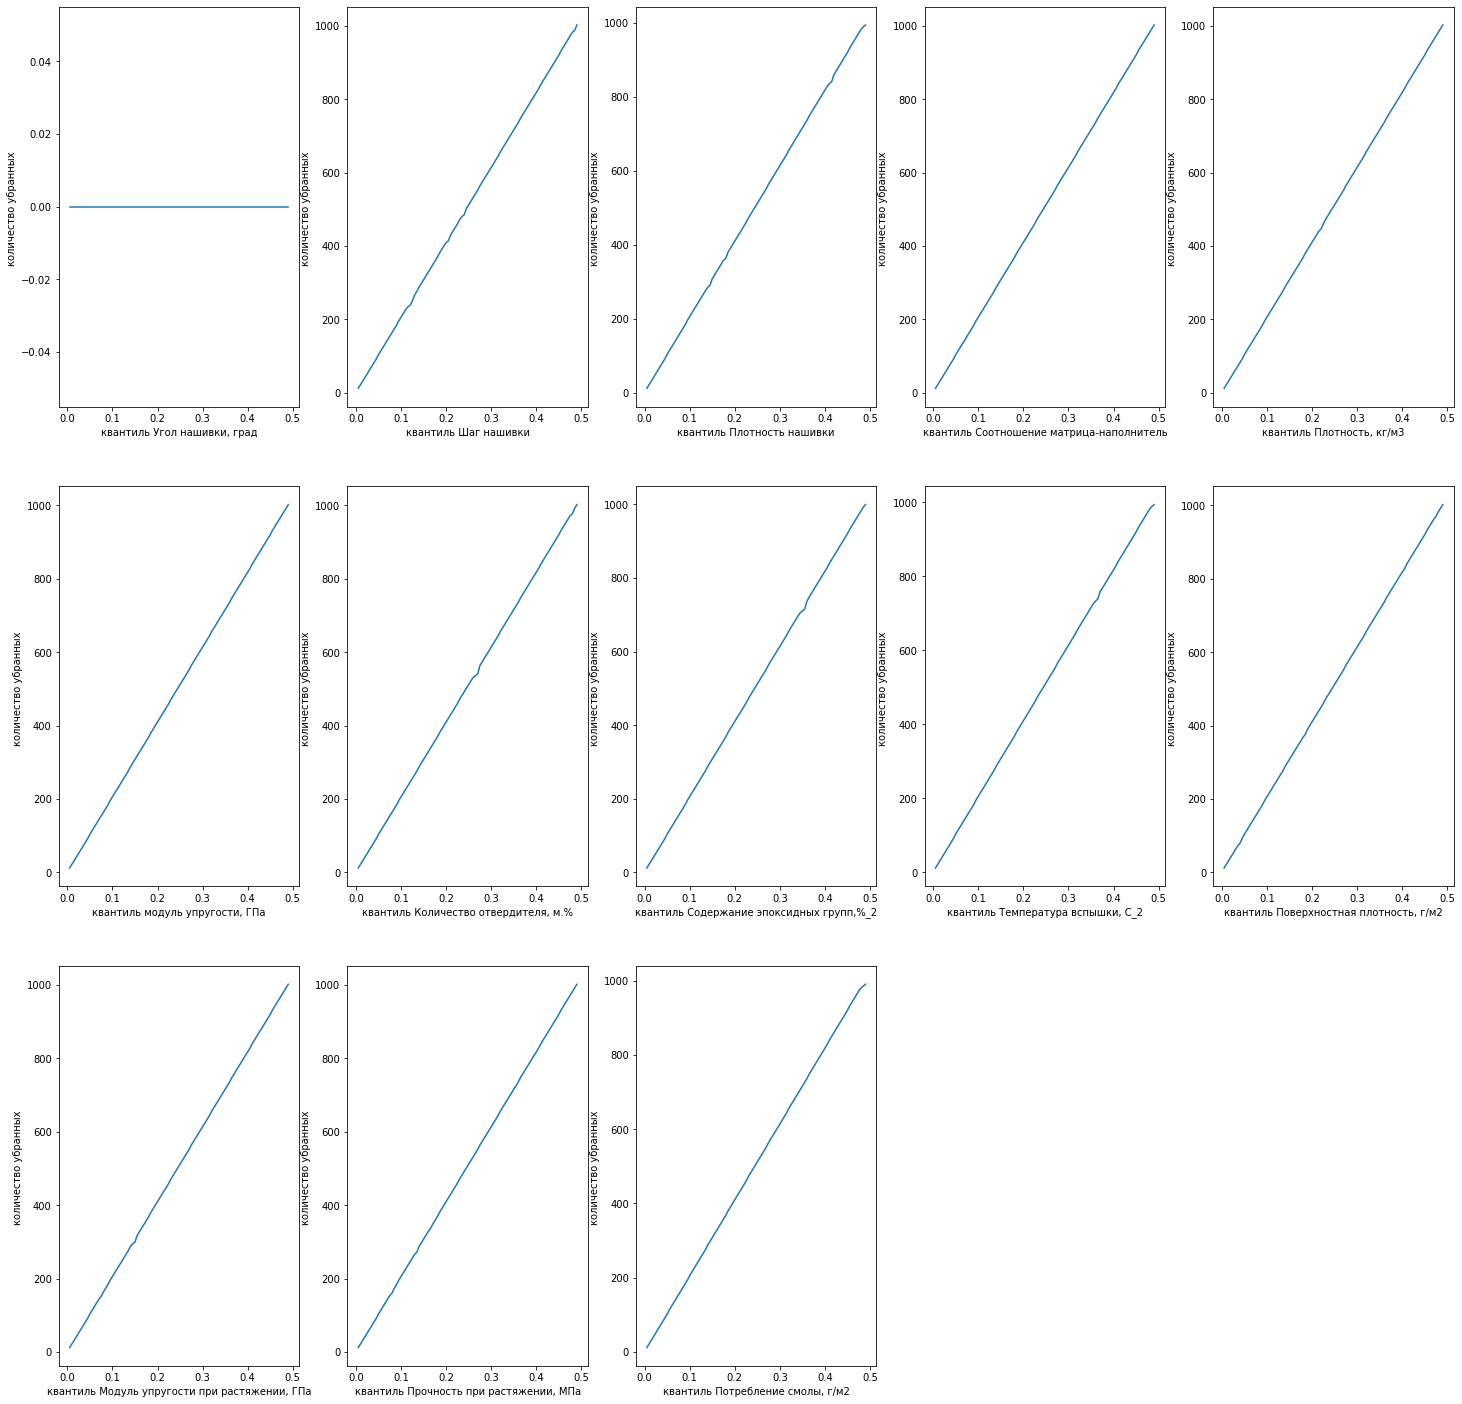

In [14]:
'''
Частично повторяем предыдущий ход, только границы квантиля теперь сжимаются с двух концов с шагом 0,005
Собираем массив из количества выброшенных за пределы значений по каждому столбцу
Строим график на каждый столбец "Квантиль/количество выброшенных". 
'''

dictparam = {} #Вспомогательный словарь для дальнейшей работы с попарными графиками. 

plt.figure(figsize=(25, 25))
for i, context in enumerate(columns):
  midle = 0
  a = []
  b = []
  while (midle < 0.49):
    midle +=0.005 
    low = midle
    up = 1-midle  
    lower_bound = df[columns[i]].quantile(q=low)
    upper_bound = df[columns[i]].quantile(q=up)
    count = df[columns[i]][(df[columns[i]] < lower_bound) | (df[columns[i]] > upper_bound)].count()
    if (round(midle,3) == 0.15):
       dictparam[context] = [lower_bound,upper_bound]
    #print(f"Данные: {context} --- Количество выбросов {count} --- Нижняя зона {lower_bound} --- Верхняя зона {upper_bound}.")
    a.append(midle)
    b.append(count)
  plt.subplot(3, 5, i+1)
  plt.plot(a, b)
  plt.xlabel('квантиль '  + context)
  plt.ylabel('количество убранных ')



Интересная история. Количество убираемых "лишних" данных в каждом столбце одинаково и линейно. Есть гипотеза, что шумов на самом деле и нет и датасет уже сбалансированный. Проверим не только глазами, но и с помощью коррелиции

In [15]:
c = []
for i, context in enumerate(columns):
  midle = 0
  a = []
  b = []
  while (midle < 0.49):
    midle +=0.005 
    low = midle
    up = 1-midle  
    lower_bound = df[columns[i]].quantile(q=low)
    upper_bound = df[columns[i]].quantile(q=up)
    count = df[columns[i]][(df[columns[i]] < lower_bound) | (df[columns[i]] > upper_bound)].count()
    
    #print(f"Данные: {context} --- Количество выбросов {count} --- Нижняя зона {lower_bound} --- Верхняя зона {upper_bound}.")
    a.append(midle)
    b.append(count)
  d = ({ 'A': pd.Series(a),
                     'B': pd.Series(b)
                     })

  df3 = pd.DataFrame(d) 
  print(df3.corr())




     A   B
A  1.0 NaN
B  NaN NaN
          A         B
A  1.000000  0.999985
B  0.999985  1.000000
          A         B
A  1.000000  0.999984
B  0.999984  1.000000
          A         B
A  1.000000  0.999998
B  0.999998  1.000000
          A         B
A  1.000000  0.999997
B  0.999997  1.000000
          A         B
A  1.000000  0.999998
B  0.999998  1.000000
          A         B
A  1.000000  0.999985
B  0.999985  1.000000
          A         B
A  1.000000  0.999987
B  0.999987  1.000000
          A         B
A  1.000000  0.999989
B  0.999989  1.000000
          A         B
A  1.000000  0.999996
B  0.999996  1.000000
          A         B
A  1.000000  0.999994
B  0.999994  1.000000
          A         B
A  1.000000  0.999996
B  0.999996  1.000000
          A         B
A  1.000000  0.999986
B  0.999986  1.000000


**Попарные графики рассеяния точек**

In [16]:
'''
Для построения попарных графиков рассеяния точек возьмем вспомогательные данные из dictparam
Где запись типа dictparam[columns[1]][0] означает, что в словаре ключу, равному наименованию второго столбца "columns[1]" 
соотвествует массив из двух позиций, в нулевой позиции нижнее реальное значение данных, входящих в квантиль, а в первой позиции - верхнее значение.
Т.е. при попарном сравнении мы фактически возьмем "серединку" облака точек и выкинем то, что вокруг него
'''


'\nДля построения попарных графиков рассеяния точек возьмем вспомогательные данные из dictparam\nГде запись типа dictparam[columns[1]][0] означает, что в словаре ключу, равному наименованию второго столбца "columns[1]" \nсоотвествует массив из двух позиций, в нулевой позиции нижнее реальное значение данных, входящих в квантиль, а в первой позиции - верхнее значение.\nТ.е. при попарном сравнении мы фактически возьмем "серединку" облака точек и выкинем то, что вокруг него\n'

In [17]:
#Получим массив перечня индексов столбцов пар каждый с каждым и удалим дубликаты
pair = []
for i in range(len(columns)):
  for j in range(len(columns)):
    if (i < j): 
      pair.append([i, j])
    if (i > j) and [j, i] not in pair:
      pair.append([j, i])
len(pair)

78

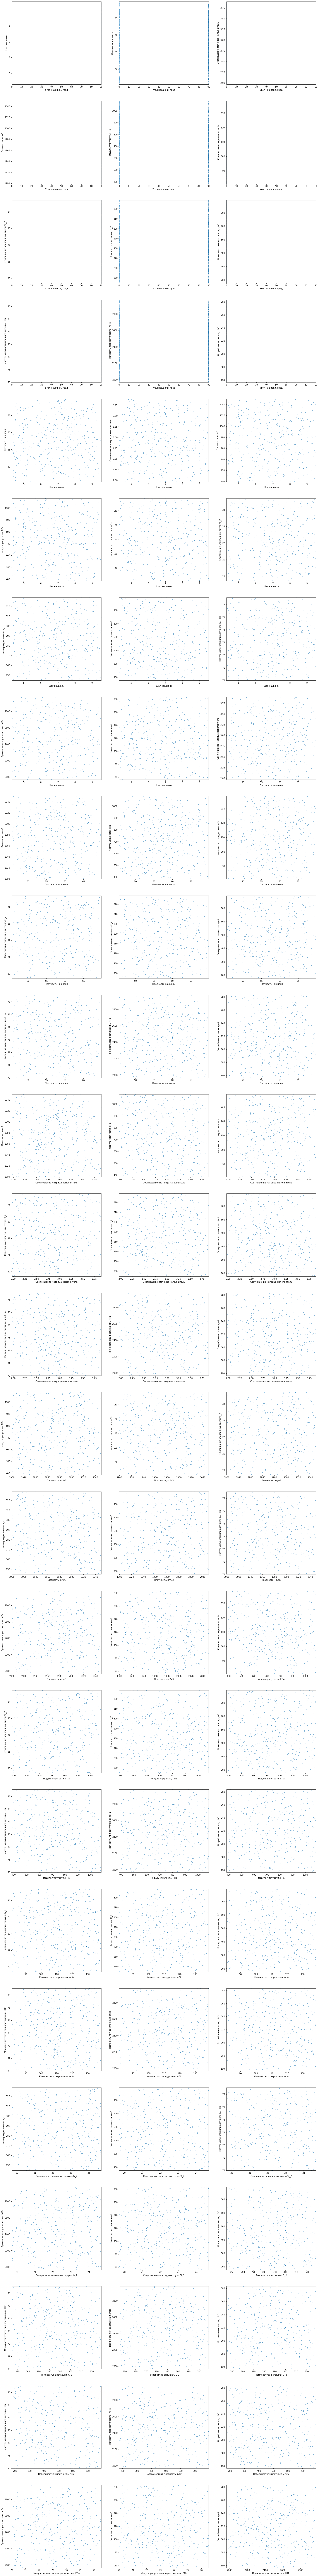

In [18]:
plt.figure(figsize=(25, 250))
calc = 0

for i in pair:     

      col1 = columns[i[0]] #столбец 1
      col2 = columns[i[1]] #столбец 2
      calc+=1     
      plt.subplot(30,3, calc)
      plt.plot(df[col1], df[col2], 'o', 
              alpha=0.5, markersize=2)
   
      plt.xlim([dictparam[col1][0], dictparam[col1][1]])
      plt.ylim([dictparam[col2][0], dictparam[col2][1]])
      plt.xlabel(columns[i[0]])
      plt.ylabel(columns[i[1]])


Визуально корреляций не наблюдается

In [19]:
df.corr()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
"Угол нашивки, град",1.000000,0.023616,0.107947,-0.031073,-0.068474,-0.025417,0.038570,0.008052,0.020695,0.052299,0.023003,0.023398,-0.015334
Шаг нашивки,0.023616,1.000000,0.003487,0.036437,-0.061015,-0.009875,0.014887,0.003022,0.025795,0.038332,-0.029468,-0.059547,0.013394
Плотность нашивки,0.107947,0.003487,1.000000,-0.004652,0.080304,0.056346,0.017248,-0.039073,0.011391,-0.049923,0.006476,0.019604,0.012239
Соотношение матрица-наполнитель,-0.031073,0.036437,-0.004652,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531
"Плотность, кг/м3",-0.068474,-0.061015,0.080304,0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937
"модуль упругости, ГПа",-0.025417,-0.009875,0.056346,0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840
"Количество отвердителя, м.%",0.038570,0.014887,0.017248,-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446
"Содержание эпоксидных групп,%_2",0.008052,0.003022,-0.039073,0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165
"Температура вспышки, С_2",0.020695,0.025795,0.011391,-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954
"Поверхностная плотность, г/м2",0.052299,0.038332,-0.049923,-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692


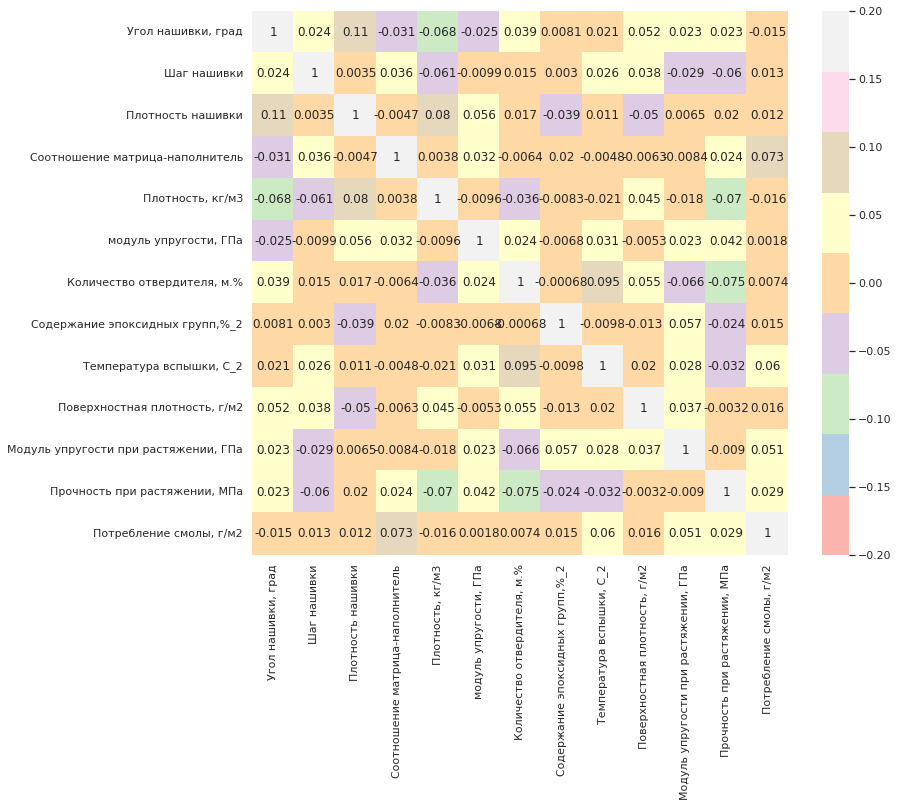

In [20]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df.corr(), vmin = -.2, vmax = +.2, annot = True, cmap = 'Pastel1')

In [21]:
df.corr().describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.089022,0.076851,0.093953,0.086677,0.063195,0.088707,0.082173,0.077030,0.094287,0.091202,0.084247,0.066526,0.095887
std,0.277115,0.279270,0.275617,0.275693,0.284651,0.274870,0.279632,0.278278,0.274173,0.274754,0.277263,0.283188,0.272961
min,-0.068474,-0.061015,-0.049923,-0.031073,-0.069981,-0.025417,-0.075375,-0.039073,-0.031763,-0.049923,-0.065929,-0.075375,-0.015937
25%,-0.015334,-0.009875,0.003487,-0.006272,-0.035911,-0.006804,-0.006445,-0.009769,-0.004776,-0.005306,-0.009009,-0.031763,0.007446
50%,0.023003,0.013394,0.012239,0.003841,-0.015937,0.023267,0.014887,-0.000684,0.020695,0.020121,0.023003,-0.003210,0.015165
75%,0.038570,0.025795,0.056346,0.031700,0.003841,0.031700,0.038570,0.015165,0.031174,0.044930,0.036702,0.024148,0.050938
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Численные показатели корелляций также низкие. Построение линейных регрессий не имеет смысла

Нормализуем данные и проверим на всякий случай на коррелиции. Ничего не должно измениться.

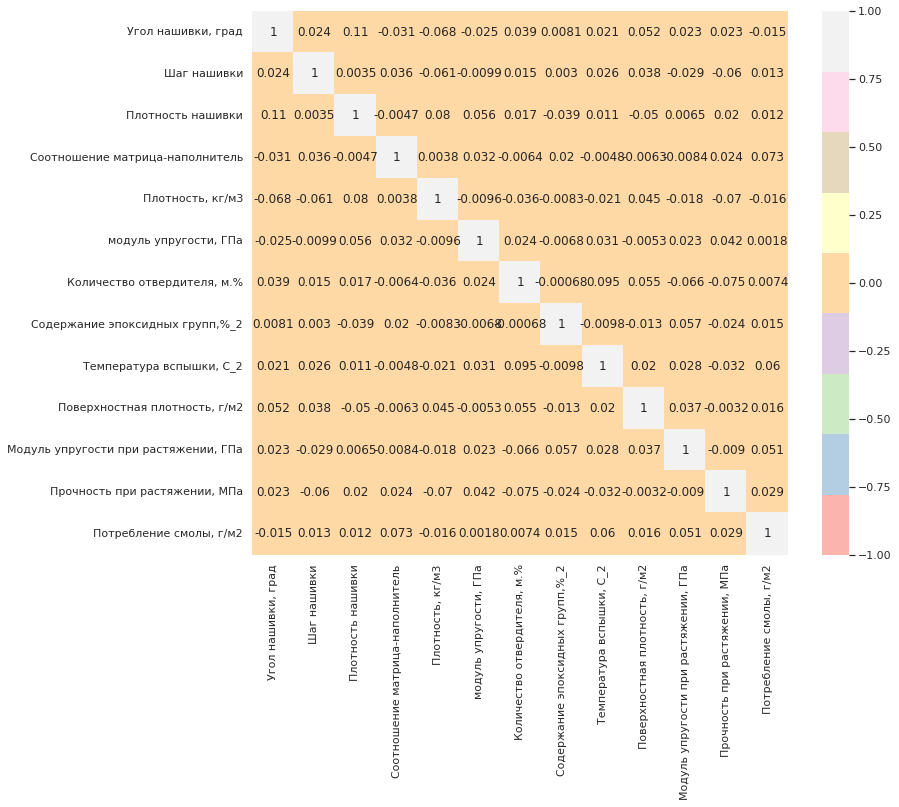

In [22]:
scaler = MinMaxScaler()
df_norm=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 

sns.heatmap(df_norm.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'Pastel1')


In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

X = df.drop('Модуль упругости при растяжении, ГПа', axis=1)
y = df['Модуль упругости при растяжении, ГПа']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



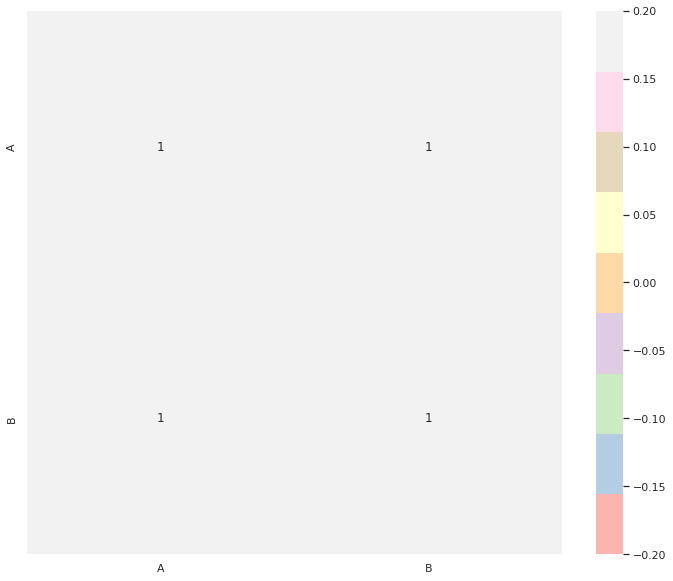

In [24]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df3.corr(), vmin = -.2, vmax = +.2, annot = True, cmap = 'Pastel1')

In [25]:
df3.describe()

,A,B
count,98.000000,98.000000
mean,0.247500,506.642857
std,0.142171,290.312461
min,0.005000,12.000000
25%,0.126250,258.500000
50%,0.247500,507.000000
75%,0.368750,755.500000
max,0.490000,990.000000


In [26]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [36]:
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': range (5, 51, 5),
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6]
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, 
cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_



{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}

In [40]:
r2_score(GSCV.predict(X_test),y_test)

-50.93472140695956

получились какие-то неадекватные результаты. исследуем подробнее

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Create the model
gradient_boosted = GradientBoostingRegressor()

# Fit the model on the training data
gradient_boosted.fit(X_train, y_train)

# Make predictions on the test data
predictions = gradient_boosted.predict(X_test)

# Evaluate the model
mae = np.mean(abs(predictions - y_test))
r2_score(y_test, predictions)
print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)



Gradient Boosted Performance on the test set: MAE = 2.7233


In [31]:
r2_score(predictions,y_test)

-7.9749024804529185

In [30]:
import pickle

In [42]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : range (5, 51, 5),
            "max_features"      : ["auto", "sqrt", "log2"],
           # "min_samples_split" : [2,4,8],
            'max_depth' : range (2, 10, 2),
            "bootstrap": [True, False]
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=10)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)    
    pickle.dump(estimator, open('model_RandomForestRegressor.pkl', 'wb'))
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    
    print ("MAE:", np.mean(abs(y_predict - y_test)))
    return y_test,y_predict



In [43]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    #X_train, X_test, y_train, y_test = 
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------
R2 score: -0.03921486754323733
MAE: 2.611656142500465
Best Score: -0.008161656552403751
Best params: {'bootstrap': True, 'max_depth': 2, 'max_features': 'log2', 'n_estimators': 15}
Loop:  1
--------------
R2 score: -0.02307887447015111
MAE: 2.5779120506472046
Best Score: -0.007255788843201838
Best params: {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 15}
Loop:  2
--------------
R2 score: -0.04881577945692972
MAE: 2.6222479853090936
Best Score: -0.008859164199336533
Best params: {'bootstrap': True, 'max_depth': 2, 'max_features': 'log2', 'n_estimators': 15}
Loop:  3
--------------
R2 score: -0.05267592412182065
MAE: 2.62302914690792
Best Score: -0.010293890249294658
Best params: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 5}
Loop:  4
--------------
R2 score: -0.045777701026032735
MAE: 2.606209885915869
Best Score: -0.011276581732155877
Best params: {'bootstrap': True, 'max_depth': 4, 'max_features': 'a

In [44]:
df

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
Индекс,,,,,,,,,,,,,
0.0,0.0,4.000000,57.000000,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1.0,0.0,4.000000,60.000000,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2.0,0.0,4.000000,70.000000,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3.0,0.0,5.000000,47.000000,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4.0,0.0,5.000000,57.000000,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,90.0,9.076380,47.019770,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019.0,90.0,10.565614,53.750790,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020.0,90.0,4.161154,67.629684,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764


In [45]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline
# Импортируем один из пакетов Matplotlib
import pylab
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTENC
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Преобразуем непрерывные значения в дискретные. Для этого нормализуем матрицу и будем подбирать число дискретизации для более-менее верного прогноза. Отдельно можно исследовать вопрос о разной степени дискретизации разных параметров.


In [46]:
scaler = MinMaxScaler()
df_norm=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 
df_norm  = df.copy(deep=True)
#Число дискретизации
N = 5

#Применяем целочисленное деление. Колчиество интервалов должно быть на 1 больше количества лейблов
#cut_labels = [i for i in range (-1, 100, 100//N)] 
cut_labels = [i for i in range (N)] 
cut_bins = [i/100 for i in range (-1, 100+100//N, 100//N)]
cut_labels

[0, 1, 2, 3, 4]

In [47]:
df_sprav = df.copy(deep=True)
df_norm_bins = df.copy(deep=True)

for column in df.columns:
  df_norm_bins[column] = pd.cut(df[column], bins = N, labels=cut_labels)
  df_sprav[column] = pd.cut(df[column], bins = N)
df_norm_bins.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023
unique,2,5,5,5,5,5,5,5,5,5,5,5,5
top,0,2,2,2,2,1,2,2,2,1,2,2,2
freq,520,438,575,436,495,396,495,507,451,367,466,459,496


In [48]:
v = (df_sprav['Соотношение матрица-наполнитель']).cat.categories
v[0]

Interval(0.384, 1.43, closed='right')

In [49]:
df_norm_bins['Шаг нашивки']

Индекс
0.0       1
1.0       1
2.0       1
3.0       1
4.0       1
         ..
1018.0    3
1019.0    3
1020.0    1
1021.0    2
1022.0    2
Name: Шаг нашивки, Length: 1023, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [50]:
df_norm_bins
pd.value_counts(df_norm_bins['Соотношение матрица-наполнитель'])

2    436
1    269
3    233
0     45
4     40
Name: Соотношение матрица-наполнитель, dtype: int64

In [51]:
def Sequential_model(vectors, labels, nlayers = 6): #Вектора, лейблы, количество слоев
  _,input = vectors.shape
  _,output = labels.shape
  model = tf.keras.Sequential()
  
  model.add(tf.keras.layers.Input(shape=(input,))) # первый слой = размерность входного вектора
  i = 1
  while i < nlayers-1:
   if i == 1:
     N = input*2 #первый слой повышающий
   #'sigmoid', 'relu'  
   model.add(tf.keras.layers.Dense(N, activation='relu'))
   if N//2 >= output: # начинаем уменьшать с шагом в 2 раза
     N = N//2
   i +=1

  model.add(tf.keras.layers.Dense(output, activation='softmax')) # последний слой = количеству тематик    
  return model

In [52]:
#lables_unbi = np.array(list(dataset['idtem'])) #не бинаризированные лейблы, т.е. тупо перечень тематик


X = df_norm_bins.drop('Соотношение матрица-наполнитель', axis=1)
y = df_norm_bins['Соотношение матрица-наполнитель']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tokenizer = LabelBinarizer()
tokenizer.fit(y)
labels = tokenizer.transform(y)
labels.shape

vectors = np.array(X).astype('float32')

test_split = 0.3
X_train, X_test, y_train, y_test = train_test_split(vectors, labels, test_size=test_split)

In [53]:
#рисемплинг данных принес неудачу
'''
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTENC
from collections import Counter

X = df_norm_bins.drop('Соотношение матрица-наполнитель', axis=1)
y = df_norm_bins['Соотношение матрица-наполнитель']
test_split = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split)

print(f'Resampled dataset samples per class {Counter(y_train)}')

'''

"\nimport matplotlib.pyplot as plt\nfrom sklearn.datasets import make_classification\nfrom imblearn.over_sampling import ADASYN\nfrom imblearn.over_sampling import SMOTENC\nfrom collections import Counter\n\nX = df_norm_bins.drop('Соотношение матрица-наполнитель', axis=1)\ny = df_norm_bins['Соотношение матрица-наполнитель']\ntest_split = 0.3\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split)\n\nprint(f'Resampled dataset samples per class {Counter(y_train)}')\n\n"

In [54]:
#Провели рисемплинг
'''
sm = SMOTE(k_neighbors =4)
X_train_res, y_train_res = sm.fit_resample(X, y)


print(f'Resampled dataset samples per class {Counter(y_train_res)}')
'''

"\nsm = SMOTE(k_neighbors =4)\nX_train_res, y_train_res = sm.fit_resample(X, y)\n\n\nprint(f'Resampled dataset samples per class {Counter(y_train_res)}')\n"

In [55]:
num_epochs = 500
model = Sequential_model(vectors, labels, nlayers = 3)
model.summary()
#'adam, SGD'
model.compile(loss="mse", optimizer='adam', metrics=['accuracy'])
history = model.fit(vectors, labels, epochs=num_epochs, verbose=2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 5)                 125       
                                                                 
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
32/32 - 3s - loss: 0.1736 - accuracy: 0.3891 - 3s/epoch - 93ms/step
Epoch 2/500
32/32 - 0s - loss: 0.1540 - accuracy: 0.3969 - 67ms/epoch - 2ms/step
Epoch 3/500
32/32 - 0s - loss: 0.1449 - accuracy: 0.4027 - 63ms/epoch - 2ms/step
Epoch 4/500
32/32 - 0s - loss: 0.1428 - accuracy: 0.4008 - 64ms/epoch - 2ms/step
Epoch 5/500
32/32 - 0s - loss: 0.1424 - accuracy: 0.3998 - 67ms/epoch - 2ms/step
Epoch 6/500
32/32 - 0s - loss: 0.1413 - accuracy: 

In [56]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
495,0.123363,0.524927,495
496,0.123059,0.524927,496
497,0.123573,0.525904,497
498,0.123536,0.519062,498
499,0.123508,0.522972,499


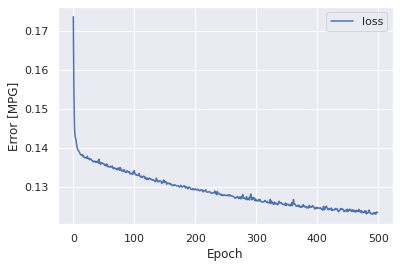

In [57]:
def plot_loss(hist):
  plt.plot(hist['loss'], label='loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
  
plot_loss(hist)

In [58]:
result = model.predict(X_test)
"""
https://habr.com/ru/company/ods/blog/328372/
бинарезируем матрицу распределения по отсечке в K. Вообще не очевидно, что отсечка 0,5.  
При повышении числа падает recall (то, что класс вообще определен, что у нас тематика вообще рассматривается как вероятная)
 и растет  precision (точность определения класса). 
Т.е. мы с одной стороны точнее говорим, что тематика ТОЧНО стоит, 
но с другой, пропускаем ненадежно поставленные. Логика такая. Мы срезаем количество поставленных тематик
, очевидно, повышая точность, но как бы нужен баланс, зачем нам точно поставленая тематика, но одна? 
"""

K = 0.6
yhat = (result > K).astype(np.int_)

In [59]:
from sklearn.metrics import classification_report
report = classification_report(y_test, yhat)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.80      0.05      0.09        80
           2       0.71      0.25      0.37       128
           3       1.00      0.03      0.06        69
           4       0.00      0.00      0.00        17

   micro avg       0.74      0.13      0.22       307
   macro avg       0.70      0.08      0.13       307
weighted avg       0.77      0.13      0.20       307
 samples avg       0.13      0.13      0.13       307



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


___________________________________________________________________


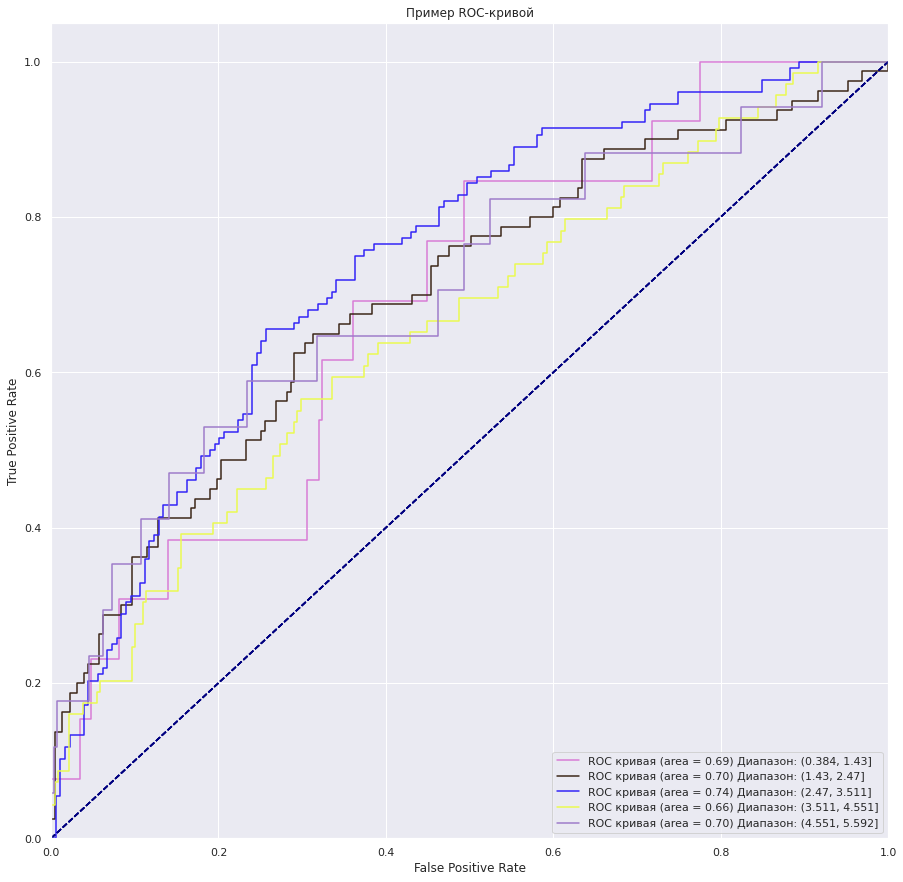

In [60]:
"""
отчет по всем классификаторам
"""


plt.figure(figsize=(15, 15))
for i in range(labels.shape[1]):  
    ou = str((df_sprav['Соотношение матрица-наполнитель']).cat.categories[i])
    #print (f'roc_auc_score {i}', round(roc_auc_score(y_test[:,i],yhat[:,i]),3)) 


    fpr, tpr, treshold = roc_curve(y_test[:,i],result[:,i])
    roc_auc = auc(fpr, tpr)
   
      # строим график
    plt.plot(fpr, tpr, color=np.random.rand(3,),
            label='ROC кривая (area = %0.2f)' % roc_auc + ' Диапазон: ' + ou)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Пример ROC-кривой')
    plt.legend(loc="lower right")

print('___________________________________________________________________')






---



In [61]:
(df_sprav['Соотношение матрица-наполнитель']).cat.categories

IntervalIndex([(0.384, 1.43], (1.43, 2.47], (2.47, 3.511], (3.511, 4.551], (4.551, 5.592]], dtype='interval[float64, right]')

In [62]:

df_sprav2 = pd.DataFrame()

for column in df.columns:
 
  df_sprav2[column+' inerval'] = pd.cut(df[column], bins = N)
df_sprav2.groupby

<bound method DataFrame.groupby of        Угол нашивки, град inerval Шаг нашивки inerval  \
Индекс                                                  
0.0                 (-0.09, 18.0]      (2.888, 5.776]   
1.0                 (-0.09, 18.0]      (2.888, 5.776]   
2.0                 (-0.09, 18.0]      (2.888, 5.776]   
3.0                 (-0.09, 18.0]      (2.888, 5.776]   
4.0                 (-0.09, 18.0]      (2.888, 5.776]   
...                           ...                 ...   
1018.0               (72.0, 90.0]     (8.664, 11.552]   
1019.0               (72.0, 90.0]     (8.664, 11.552]   
1020.0               (72.0, 90.0]      (2.888, 5.776]   
1021.0               (72.0, 90.0]      (5.776, 8.664]   
1022.0               (72.0, 90.0]      (5.776, 8.664]   

       Плотность нашивки inerval Соотношение матрица-наполнитель inerval  \
Индекс                                                                     
0.0             (41.596, 62.393]                            (1.43, 2.47